# Finding the right ebike

The following analysis is follow-up from the ebike_specs script which uses a variety of functions building on BeautifulSoup to extract the desired specs for all ebikes on the website https://electricbikereview.com

I used these tests to rank the bikes in order to find the best specs for the price (with some user preference involved in the final decision)

#### To extract data:
    from product_analysis.ebike_analysis.ebike_specs import compile_product_specs
    specs = compile_product_specs(n_pages=104)
    specs.to_csv(<output>)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
# Import the data collected from the review website
ebikes = pd.read_csv('data_pg_1_104_with_url.csv')

In [3]:
ebikes.head()

,Unnamed: 0,make,model,price,total_weight,motor_nominal_output,estimated_min_range,estimated_max_range,battery_watt_hours,url
0,0,Specialized,TurboVadoSL4.0EQ,3500.0,36.9,240.0,35.0,75.0,331.2,https://electricbikereview.com/specialized/tur...
1,1,iGOElectric,CoreExtreme2.0,1999.0,71.5,500.0,30.0,50.0,624.0,https://electricbikereview.com/igo-electric/co...
2,2,Aventon,Level,1599.0,58.6,500.0,30.0,57.0,672.0,https://electricbikereview.com/aventon/level/
3,3,Riese&amp;Müller,DeliteGTRohloff,8759.0,62.8,250.0,35.0,80.0,482.4,https://electricbikereview.com/riese-muller/de...
4,4,SONDORS,FoldXS,1699.0,68.9,750.0,30.0,50.0,672.0,https://electricbikereview.com/sondors/fold-xs/


In [4]:
# Total number of ebikes to check out
len(ebikes)

1038

# Visualize Metrics

(0, 1200)

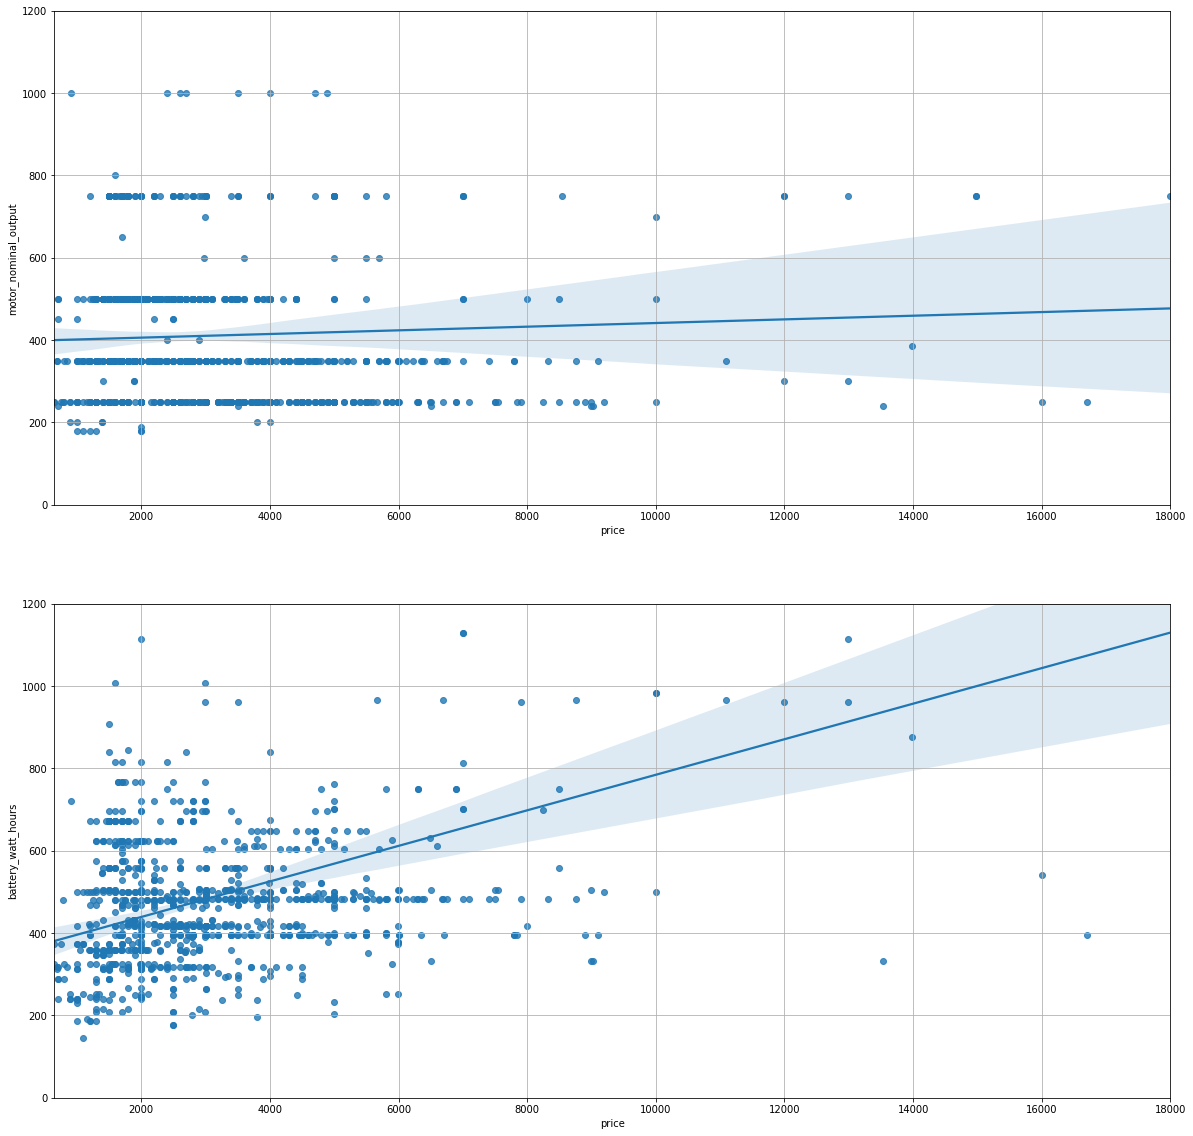

In [5]:
fig, axes = plt.subplots(2,1,figsize=(20,20))

# Visualize battery capacity vs. price
sns.regplot(ebikes['price'], ebikes['motor_nominal_output'], ax=axes[0])
axes[0].grid()
axes[0].set_ylim([0, 1200])

# Visualize motor power vs. prive
sns.regplot(ebikes['price'], ebikes['battery_watt_hours'], ax=axes[1])
axes[1].grid()
axes[1].set_ylim([0, 1200])

Text(0.5, 0, 'Battery Size (Wh)')

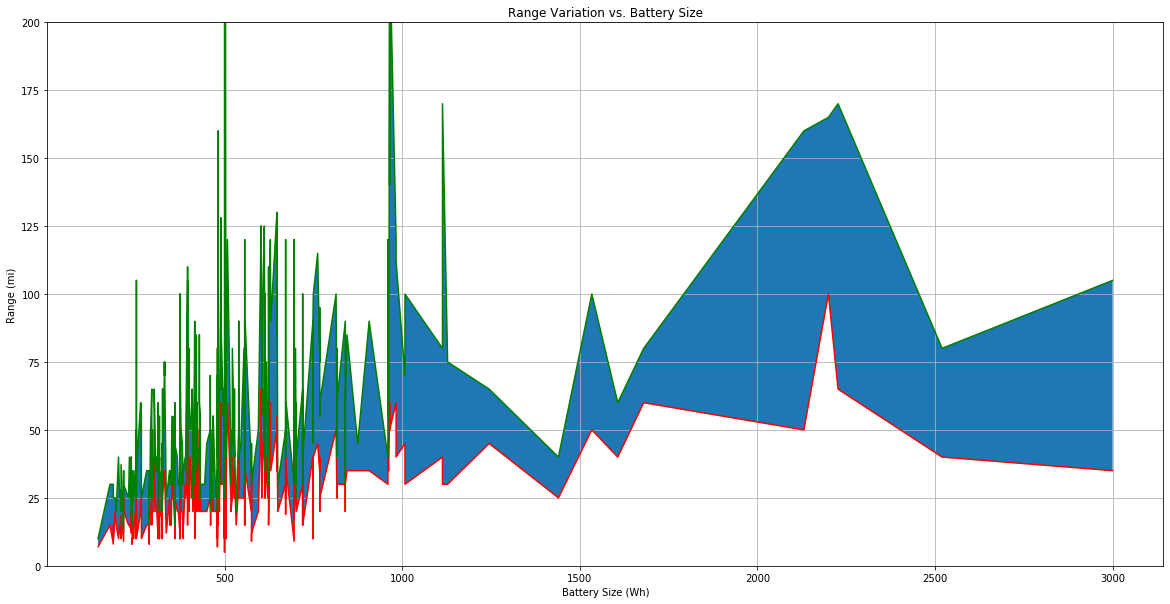

In [6]:
ebikes_cap_sorted = ebikes.sort_values(by='battery_watt_hours')
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ebikes_cap_sorted['battery_watt_hours'], ebikes_cap_sorted['estimated_min_range'], 'r')
ax.plot(ebikes_cap_sorted['battery_watt_hours'], ebikes_cap_sorted['estimated_max_range'], 'g')
ax.fill_between(ebikes_cap_sorted['battery_watt_hours'],
                ebikes_cap_sorted['estimated_min_range'],
                ebikes_cap_sorted['estimated_max_range'])
ax.grid()
ax.set_ylim([0, 200])
ax.set_title('Range Variation vs. Battery Size')
ax.set_ylabel('Range (mi)')
ax.set_xlabel('Battery Size (Wh)')

# Score the bikes

#### Currenlty using battery capacity and power output to score

In [7]:
ebikes['capacity_per_dollar'] = ebikes['battery_watt_hours'] / ebikes['price']
ebikes['power_per_dollar'] = ebikes['motor_nominal_output'] / ebikes['price']

ebikes['capacity_per_dollar_norm'] = ebikes['capacity_per_dollar'] * (ebikes['price'].max() / ebikes['battery_watt_hours'].max())
ebikes['power_per_dollar_norm'] = ebikes['power_per_dollar'] * (ebikes['price'].max() / ebikes['motor_nominal_output'].max())

In [8]:
ebikes['score'] = ebikes['capacity_per_dollar_norm'] + ebikes['power_per_dollar_norm']
ebikes = ebikes.sort_values(by='score', ascending=False)
ebikes.head(10)

,Unnamed: 0,make,model,price,total_weight,motor_nominal_output,estimated_min_range,estimated_max_range,battery_watt_hours,url,capacity_per_dollar,power_per_dollar,capacity_per_dollar_norm,power_per_dollar_norm,score
772,772,CutlerCycles,FusionElectricBike,900.0,95.0,1000.0,30.0,55.0,720.0,https://electricbikereview.com/cutler-cycles/f...,0.800000,1.111111,4.800000,4.444444,9.244444
84,84,Revolve,60+Miles,1950.0,85.5,500.0,60.0,80.0,1680.0,https://electricbikereview.com/revolve/60-plus...,0.861538,0.256410,5.169231,1.025641,6.194872
108,108,RadPowerBikes,RadRunner,1199.0,64.0,750.0,25.0,45.0,672.0,https://electricbikereview.com/rad-power-bikes...,0.560467,0.625521,3.362802,2.502085,5.864887
39,39,BPMImports,F-15RZ,1595.0,69.2,750.0,30.0,100.0,1008.0,https://electricbikereview.com/bpm-imports/f-15z/,0.631975,0.470219,3.791850,1.880878,5.672727
500,500,ElectricBikeCompany,2017ModelS,1499.0,74.7,750.0,35.0,90.0,907.2,https://electricbikereview.com/trek/powerfly-8...,0.605203,0.500334,3.631221,2.001334,5.632555
41,41,Himiway,Cruiser,1499.0,71.5,750.0,30.0,60.0,840.0,https://electricbikereview.com/himiway/cruiser...,0.560374,0.500334,3.362241,2.001334,5.363576
781,781,Ridekick,PowerTrailer,699.0,42.5,500.0,10.0,15.0,288.0,https://electricbikereview.com/ridekick/power-...,0.412017,0.715308,2.472103,2.861230,5.333333
1035,1035,RideKick,2013PowerTrailer,699.0,43.0,500.0,10.0,15.0,288.0,https://electricbikereview.com/ridekick/2013-p...,0.412017,0.715308,2.472103,2.861230,5.333333
85,85,Nakto,Camel,649.0,60.0,250.0,10.0,25.0,374.4,https://electricbikereview.com/nakto/camel/,0.576888,0.385208,3.461325,1.540832,5.002157
44,44,LectriceBikes,LectricXP,999.0,62.2,500.0,25.0,50.0,499.2,https://electricbikereview.com/lectric-ebikes/...,0.499700,0.500501,2.998198,2.002002,5.000200


In [9]:
ebikes_top10 = ebikes.loc[ebikes.head(10).index]

# Visualize Top Tier

(0, 1200)

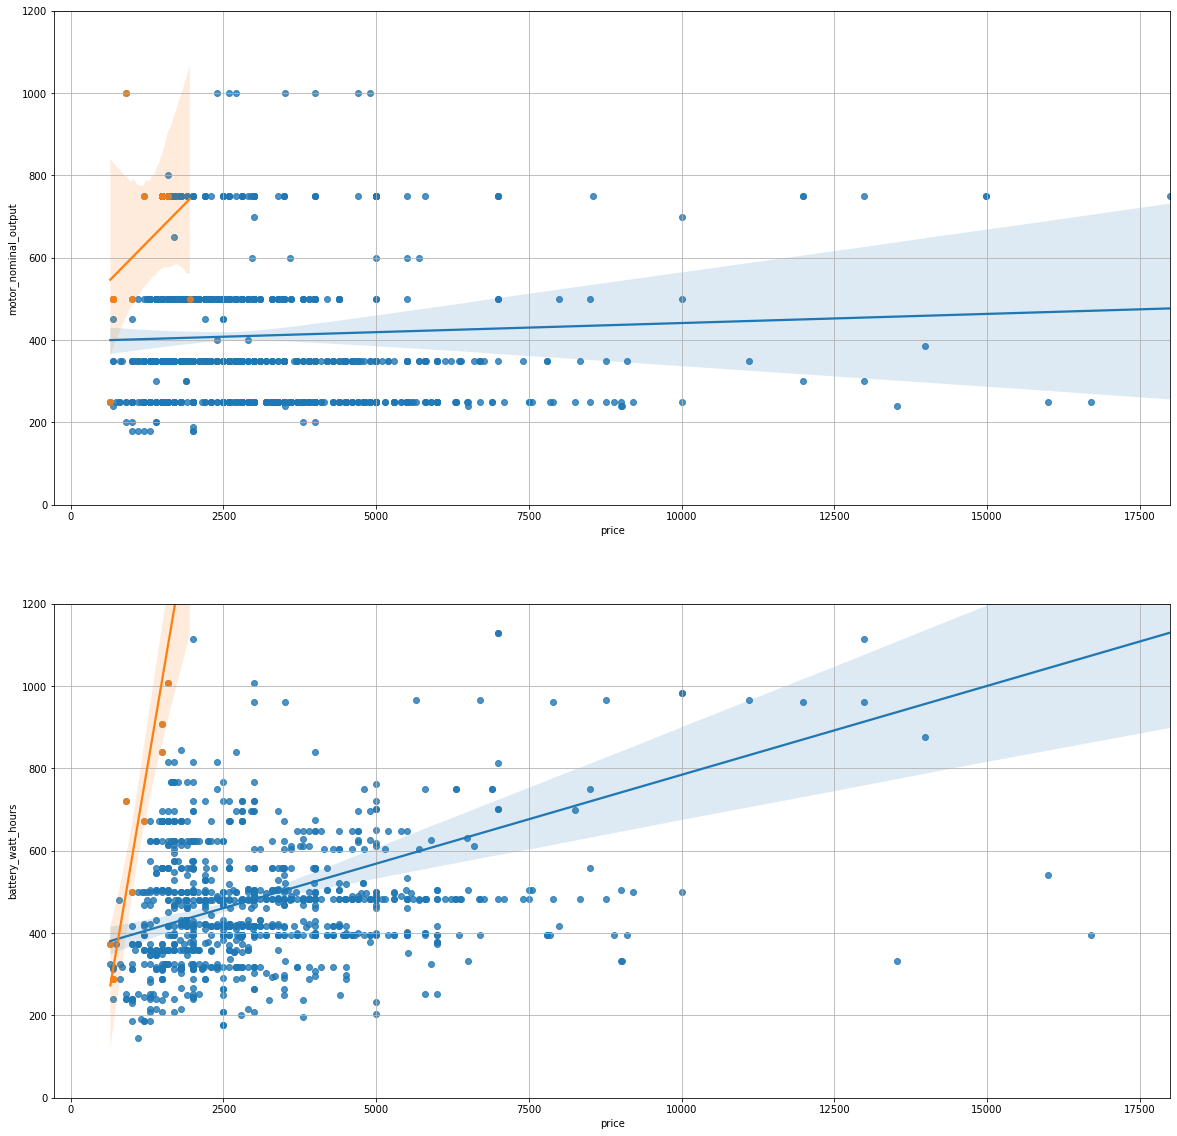

In [10]:
fig, axes = plt.subplots(2,1,figsize=(20,20))

# Visualize battery capacity vs. price
sns.regplot(ebikes['price'], ebikes['motor_nominal_output'], ax=axes[0])
sns.regplot(ebikes_top10['price'], ebikes_top10['motor_nominal_output'], ax=axes[0])
axes[0].grid()
axes[0].set_ylim([0, 1200])

# Visualize motor power vs. prive
sns.regplot(ebikes['price'], ebikes['battery_watt_hours'], ax=axes[1])
sns.regplot(ebikes_top10['price'], ebikes_top10['battery_watt_hours'], ax=axes[1])
axes[1].grid()
axes[1].set_ylim([0, 1200])

#### The winners

In [11]:
ebikes_top10[['make', 'model', 'price']]

,make,model,price
772,CutlerCycles,FusionElectricBike,900.0
84,Revolve,60+Miles,1950.0
108,RadPowerBikes,RadRunner,1199.0
39,BPMImports,F-15RZ,1595.0
500,ElectricBikeCompany,2017ModelS,1499.0
41,Himiway,Cruiser,1499.0
781,Ridekick,PowerTrailer,699.0
1035,RideKick,2013PowerTrailer,699.0
85,Nakto,Camel,649.0
44,LectriceBikes,LectricXP,999.0


#### Corresponding urls

In [14]:
ebikes_top10['url'].values

array(['https://electricbikereview.com/cutler-cycles/fusion-electric-bike/',
       'https://electricbikereview.com/revolve/60-plus-miles/',
       'https://electricbikereview.com/rad-power-bikes/radrunner/',
       'https://electricbikereview.com/bpm-imports/f-15z/',
       'https://electricbikereview.com/trek/powerfly-8-fs-plus/',
       'https://electricbikereview.com/himiway/cruiser-ebike/',
       'https://electricbikereview.com/ridekick/power-trailer/',
       'https://electricbikereview.com/ridekick/2013-power-trailer/',
       'https://electricbikereview.com/nakto/camel/',
       'https://electricbikereview.com/lectric-ebikes/lectric-xp/'],
      dtype=object)

### My choice!

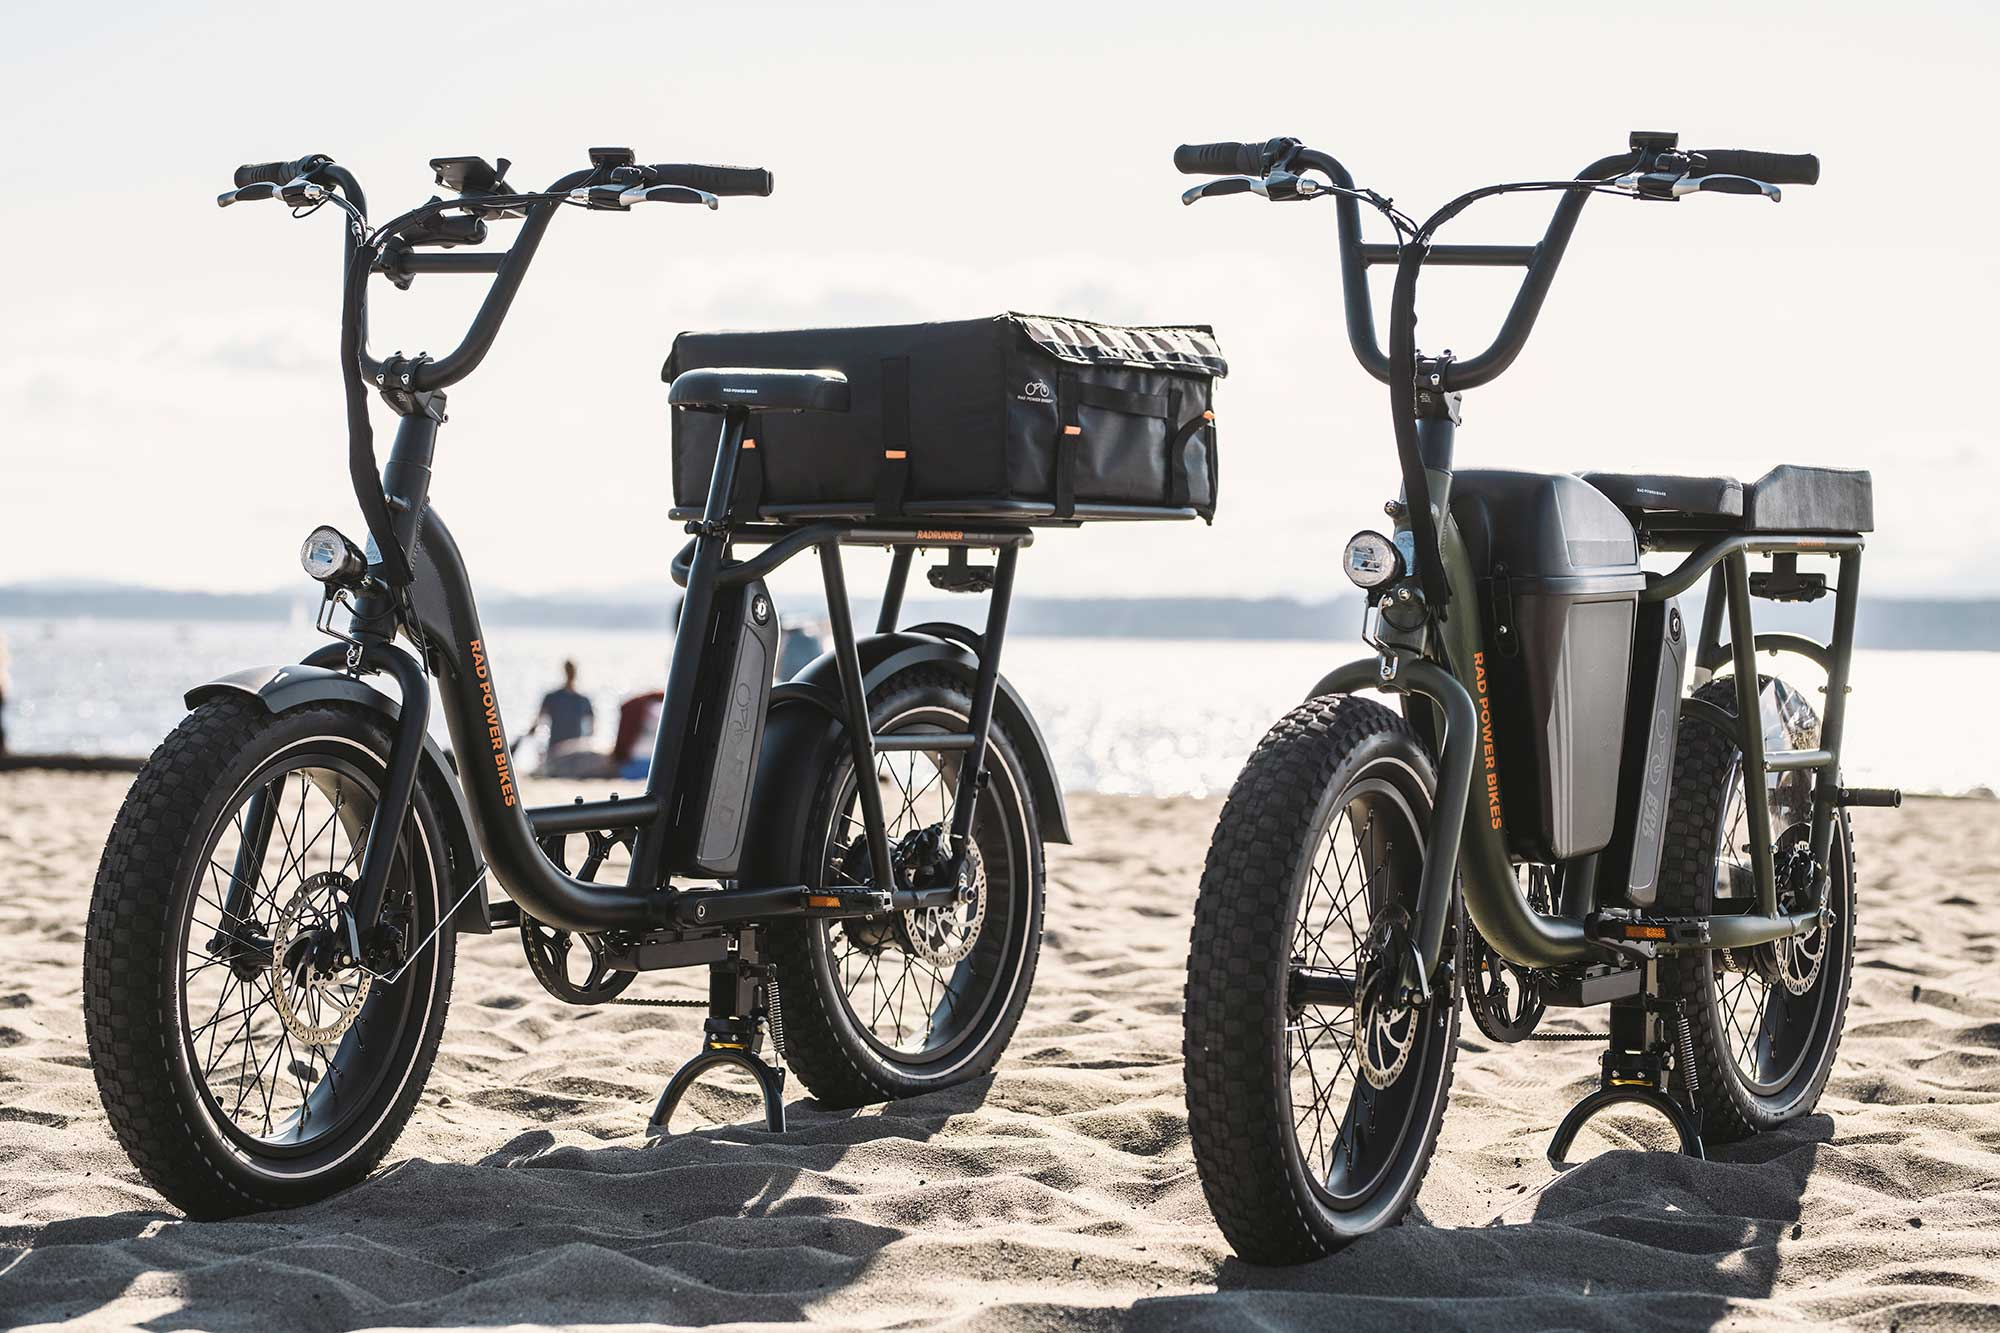

In [13]:
Image('RadRunner.jpg')